In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as tts
from sklearn import datasets

In [2]:
#Übung 1
data = np.loadtxt('data/smp_data.dat', delimiter=',')
xdata = data[:,0].reshape((-1,1)) #Bedeutung von (-1, 1): unbekannte Anzahl an Zeilen bei genau einer Spalte --> Spaltenvektor
ydata = data[:,1]

model = lr()
model.fit(xdata, ydata)
y_pred = model.predict(xdata) #Vorhersage bestimmen

In [3]:
print('MSE:', mse(ydata, y_pred, squared=True))

MSE: 6717.449897727901


In [4]:
print('R2:', r2_score(ydata, y_pred))

R2: 0.783015570003795


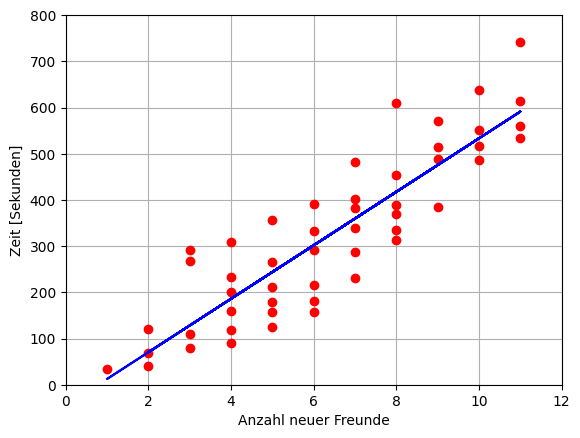

In [5]:
plt.xlabel('Anzahl neuer Freunde')
plt.ylabel('Zeit [Sekunden]')
plt.grid(True)
plt.axis([0,12,0,800])
plt.plot(xdata, ydata, 'ro')
plt.plot(xdata, y_pred, 'b-')
plt.show()

In [18]:
#Übung 2
data = np.loadtxt('data/smp_data.dat', delimiter=',')
xdata = data[:,0].reshape((-1,1))
ydata = data[:,1]
x_train, x_test, y_train, y_test = tts(xdata, ydata, test_size=0.2, random_state=42) #test_size Anteil Testfälle %, random_state bestimmt zufällige Durchmischung der Daten vor dem Split, Daten jedes Mal, wenn der Code ausgeführt wird, auf die gleiche Weise aufgeteilt werden. Das ist nützlich, um die Ergebnisse reproduzierbar zu machen, da dieselbe Aufteilung der Daten bei jedem Ausführen des Codes beibehalten wird.

model = lr()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)

In [19]:
print('MSE (train):', mse(y_train, y_train_pred, squared=True)) #optional: False liefert RMSE

MSE (train): 5937.88860246573


In [20]:
print('R2 (train):', r2_score(y_train, y_train_pred))

R2 (train): 0.8059946197059286


In [21]:
y_test_pred = model.predict(x_test)
print('MSE (test):', mse(y_test, y_test_pred, squared=True))

MSE (test): 10106.925378140955


In [22]:
print('R2 (test):', r2_score(y_test, y_test_pred))

R2 (test): 0.6874327241476486


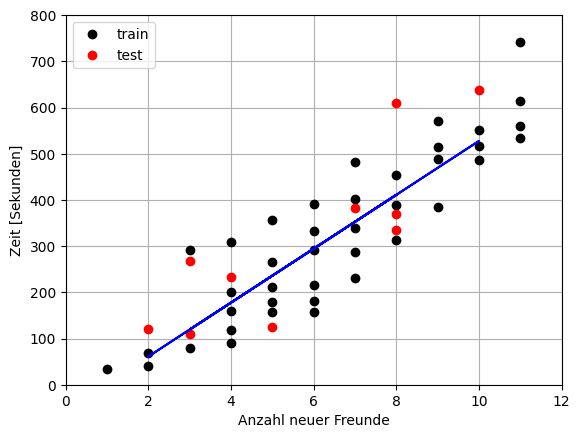

In [23]:
plt.xlabel('Anzahl neuer Freunde')
plt.ylabel('Zeit [Sekunden]')
plt.grid(True)
plt.axis([0,12,0,800])
plt.plot(x_train, y_train, 'ko', label='train')
plt.plot(x_test, y_test, 'ro', label='test')
plt.plot(x_test, y_test_pred, 'b-')
plt.legend(loc=2)
plt.show()

In [24]:
#Übung 3
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_x = diabetes_x[:, np.newaxis, 2]
x_train, x_test, y_train, y_test = tts(diabetes_x, diabetes_y, test_size=0.2, random_state=42)

model = lr()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)

In [25]:
print('MSE (train):', mse(y_train, y_train_pred, squared=True)) #optional: False liefert RMSE

MSE (train): 3854.11265207582


In [26]:
print('R2 (train):', r2_score(y_train, y_train_pred))
y_test_pred = model.predict(x_test)

R2 (train): 0.3657241273794126


In [27]:
print('MSE (test):', mse(y_test, y_test_pred, squared=True))

MSE (test): 4061.8259284949268


In [28]:
print('R2 (test):', r2_score(y_test, y_test_pred))

R2 (test): 0.23335039815872138


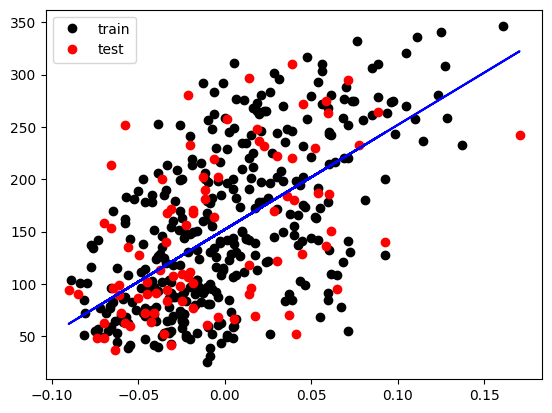

In [29]:
plt.plot(x_train, y_train, 'ko', label='train')
plt.plot(x_test, y_test, 'ro', label='test')
plt.plot(x_test, y_test_pred, 'b-')
plt.legend(loc=2)
plt.show()